# Project 3
## Ignacio, Josh, jake

### Title of paper: Predicting post-war US recessions: A probit modelling approach
Authors: Constantinos Alexioua, Emmanouil Trachanas
<br></br>
Journal: Structural Change and Economic Dynamics
<br></br>
Publsihed: 21 April 2020

# 1. Origninal Study Summary

## (a) Research Question

#### Main Research Question:

#### Does profitability affect the probability of U.S. recessions?
More precisely, the paper investigates whether changes in the U.S. rate of profit can statistically explain the likelihood of recession episodes using a probit model on quarterly data from 1963Q1–2018Q2.


#### Economic Motivation:

The economic motivation of this paper lies in the longstanding theoretical claim that profitability constitutes a fundamental driver of macroeconomic fluctuations and crisis dynamics in capitalist economies. Marxian, Keynesian, and heterodox traditions all posit that declining profitability undermines investment, weakens demand, and precipitates recessionary episodes. Given the persistent downward trend in U.S. profit rates across post-war cycles and their association with stagflation, stagnation, and financial crises, understanding whether profitability statistically predicts recessions is crucial. Establishing such a link carries direct implications for macroeconomic stabilization policy, investment behavior, and the broader interpretation of business cycle instability in the U.S. economy.

##### Longer Version For a First Read-Through

Understanding the determinants of recessions in the post-war US economy is crucial because fluctuations in profitability have historically shaped investment, employment, and living standards. __Marxian theory__ emphasizes that profitability is the engine of capitalist growth: high profits stimulate investment and economic expansion, while declining profits trigger stagnation, unemployment, and recurrent crises. In this view, the tendency of the profit rate to fall during booms explains the cyclical nature of recessions.
__Keynesian__ analysis complements this perspective by focusing on the role of effective demand. Through the concept of the marginal efficiency of capital _(MEC)_, Keynes argued that investment drives savings, not the reverse. A collapse in investment reduces profits, employment, and income, thereby generating downturns. Thus, both Marx and Keynes highlight profitability and investment as central to understanding economic instability, though they differ in the direction of causality.
<br></br>
__Heterodox economists__ have further contributed with the _“wage-push”_ or _“profit-squeeze”_ theory, which attributes falling profits to rising wages driven by worker bargaining power, particularly in the 1960s and 1970s. This dynamic constrained profits which contributed to recession periods.
Looking at the timeline, it reinforces these ideas. The post-war US economy experienced two long-wave phases: the “golden age of accumulation” (mid-1960s to late 1970s), followed by stagflation, and the “neoliberal era” (1980s–2007), marked by exuberant growth before the financial crisis. Across these phases, the profit rate exhibited a declining trend, with stagflation in the 1970s and contractionary policies in the 1980s worsening unemployment and living standards. More recently, despite signs of recovery, the US economy has struggled to return to pre-2007 growth levels, suggesting a possible “new normal.”
<br></br>
Against this backdrop, examining the relationship between profitability and recession risk is highly relevant. A falling profit rate, coupled with unproductive investment, creates conditions for instability. By empirically testing whether profitability predicts recessions, this study addresses a central question in political economy and provides insights into the mechanisms driving cyclical downturns in the US business cycle.


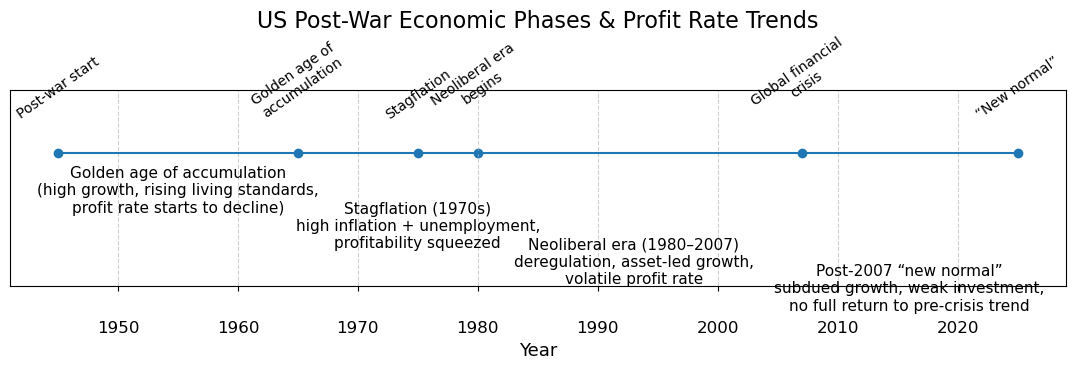

In [1]:
import matplotlib.pyplot as plt

# Key dates
years = [1945, 1965, 1975, 1980, 2007, 2025]
labels = [
    "Post-war start",
    "Golden age of\naccumulation",
    "Stagflation",
    "Neoliberal era\nbegins",
    "Global financial\ncrisis",
    "“New normal”"
]

plt.figure(figsize=(11, 3.8))

# Base timeline
plt.hlines(y=0, xmin=min(years), xmax=max(years))
plt.scatter(years, [0] * len(years))

# Event labels above points
for x, lab in zip(years, labels):
    plt.text(x, 0.35, lab, ha="center", va="bottom", rotation=35, fontsize=10)

# Phase annotations
plt.text(
    1955, -0.15,
    "Golden age of accumulation\n(high growth, rising living standards,\nprofit rate starts to decline)",
    ha="center", va="top", fontsize=11
)

plt.text(
    1975, -0.55,
    "Stagflation (1970s)\nhigh inflation + unemployment,\nprofitability squeezed",
    ha="center", va="top", fontsize=11
)

plt.text(
    1993, -0.95,
    "Neoliberal era (1980–2007)\nderegulation, asset-led growth,\nvolatile profit rate",
    ha="center", va="top", fontsize=11
)

plt.text(
    2016, -1.25,
    "Post-2007 “new normal”\nsubdued growth, weak investment,\nno full return to pre-crisis trend",
    ha="center", va="top", fontsize=11
)

# Improve visibility of years and push them lower
plt.xticks(range(1950, 2030, 10), fontsize=12)
plt.tick_params(axis='x', pad=22)
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Raise title higher
plt.title("US Post-War Economic Phases & Profit Rate Trends", pad=45, fontsize=16)

plt.yticks([])
plt.xlabel("Year", fontsize=13)
plt.ylim(-1.50, 0.7)
plt.tight_layout()
plt.show()


Saved figure to profit_rate_timeline.png


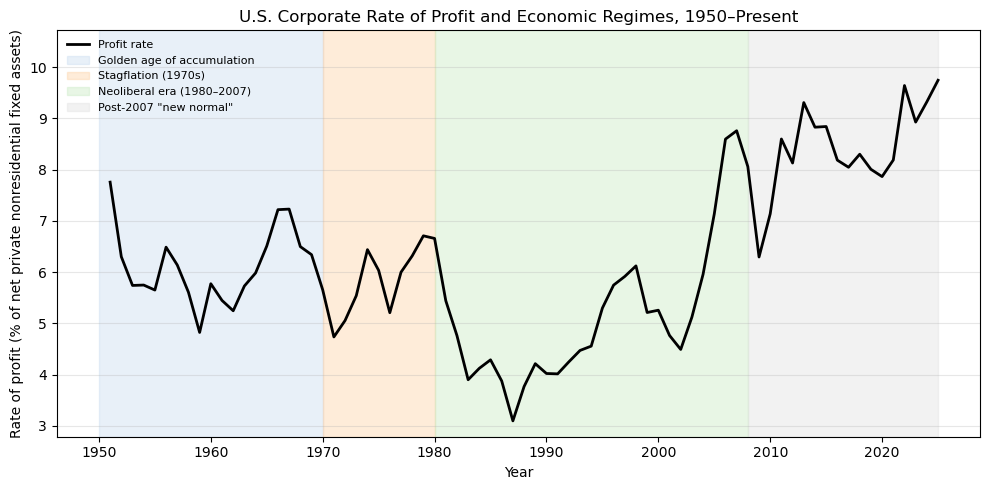

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

FRED_API_KEY = "3707355de3032aa9b43716f690e0cf29"
START_DATE = "1950-01-01"


def fetch_fred_series(series_id, api_key, start_date="1947-01-01"):
    url = "https://api.stlouisfed.org/fred/series/observations"
    params = {
        "series_id": series_id,
        "api_key": api_key,
        "file_type": "json",
        "observation_start": start_date,
    }
    r = requests.get(url, params=params)
    r.raise_for_status()
    obs = r.json()["observations"]
    df = pd.DataFrame(obs)
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df = df.dropna(subset=["date", "value"])
    return df



profits_q = fetch_fred_series("CP", FRED_API_KEY, START_DATE)
capital_a = fetch_fred_series("K1NTOTL1ES000", FRED_API_KEY, START_DATE)

profits_q["year"] = profits_q["date"].dt.year
capital_a["year"] = capital_a["date"].dt.year

profits_a = profits_q.groupby("year")["value"].mean().rename("profits_bil").to_frame()
capital_a_year = capital_a.groupby("year")["value"].mean().rename("capital_mil").to_frame()

df = profits_a.join(capital_a_year, how="inner")
df = df.loc[df.index >= 1950]

df["capital_bil"] = df["capital_mil"] / 1000.0
df["profit_rate_pct"] = (df["profits_bil"] / df["capital_bil"]) * 100.0
df = df.dropna(subset=["profit_rate_pct"])

df["date"] = pd.to_datetime(df.index.astype(str) + "-12-31")


regimes = [
    {
        "label": "Golden age of accumulation",
        "start": "1950-01-01",
        "end":   "1969-12-31",
        "color": "#c6dbef",
    },
    {
        "label": "Stagflation (1970s)",
        "start": "1970-01-01",
        "end":   "1979-12-31",
        "color": "#fdd0a2",
    },
    {
        "label": "Neoliberal era (1980–2007)",
        "start": "1980-01-01",
        "end":   "2007-12-31",
        "color": "#c7e9c0",
    },
    {
        "label": "Post-2007 \"new normal\"",
        "start": "2008-01-01",
        "end":   df["date"].max().strftime("%Y-%m-%d"),
        "color": "#e0e0e0",
    },
]


fig, ax = plt.subplots(figsize=(10, 5))

patches = []
for reg in regimes:
    start = pd.to_datetime(reg["start"])
    end = pd.to_datetime(reg["end"])
    ax.axvspan(start, end, color=reg["color"], alpha=0.4, zorder=0)
    patches.append(mpatches.Patch(color=reg["color"], alpha=0.4, label=reg["label"]))

line = ax.plot(
    df["date"],
    df["profit_rate_pct"],
    color="black",
    linewidth=2,
    label="Profit rate"
)[0]

ax.set_title("U.S. Corporate Rate of Profit and Economic Periods, 1950–Present")
ax.set_xlabel("Year")
ax.set_ylabel("Rate of profit (% of net private nonresidential fixed assets)")

ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.grid(axis="y", alpha=0.3)

ymin, ymax = df["profit_rate_pct"].min(), df["profit_rate_pct"].max()
ax.set_ylim(ymin * 0.9, ymax * 1.1)

handles = [line] + patches
ax.legend(handles=handles, frameon=False, loc="upper left", fontsize=8)

fig.tight_layout()

output_path = "profit_rate_timeline.png"
fig.savefig(output_path, dpi=300, bbox_inches="tight")
print(f"Saved figure to {output_path}")

plt.show()


## (b) Theoretical Theoretical

### Three Dominant Marxian Theories of Economic Crises

The three dominant Marxian theories explaining economic crises are:

a) **Underconsumption (Lack of Effective Demand) Theory**  
Economic crises arise because workers’ wages are insufficient to purchase the total output produced, leading to demand shortfalls and overproduction.

b) **Profit Squeeze Approach**  
Crises occur when rising wages and increased worker bargaining power compress profit margins, reducing incentives for investment and accumulation.

c) **Falling Rate of Profit Thesis**  
Crises are driven by a long-term tendency for the rate of profit to decline due to rising capital intensity and the contradiction between technological progress and surplus value extraction.


### Underconsumption Theory (Marxian Crisis Framework)

**Core claim:**  
In capitalism — particularly in its monopoly-finance stage — the system exhibits a structural tendency to generate **excess output relative to effective demand**, resulting in chronic instability and stagnation.

---

#### Main Mechanism

The crisis unfolds through a sequence of structural contradictions:

1. **Class Structure + Unequal Income Distribution**
   - Capitalism is characterized by entrenched class divisions.
   - Income is distributed unevenly in favor of capital over labor.

2. **Suppressed Wages → Weak Purchasing Power**
   - The working class receives wages insufficient to absorb total production.
   - This constrains mass consumption demand.

3. **Deficient Effective Demand**
   Effective demand fails through two channels:
   - **Low consumption demand** due to weak real wages  
   - **Low investment demand** caused by:
     - Over-accumulation of capital  
     - Diminishing profitable investment opportunities

4. **Demand Gap Emerges**
   - Output exceeds what can be absorbed by the market.
   - Surplus production accumulates.

5. **Macroeconomic Outcome**
   - Slowing economic growth  
   - Persistent stagnation  
   - Heightened instability

---

#### Conceptual Flow

Capitalist class structure  
→ Inequality in income  
→ Depressed wages  
→ Weak purchasing power  
→ Deficient effective demand  
→ Overproduction  
→ Stagnation / crisis

---

#### Key Theoretical References
- Baran & Sweezy (1966)  
- Clarke (1994)

---

**Interpretation:**  
Underconsumption theory views crises not as accidental shocks but as *systemic outcomes* of capitalism’s internal distributional logic, where the production capacity grows faster than society’s ability to consume.

### Profit Squeeze Theory (Marxian Crisis Framework)

**Core claim:**  
Economic crises emerge when rising working-class power compresses profits by shifting income away from capital and toward labor.

---

#### Main Mechanism

This approach explains crisis through a distributional conflict between labor and capital:

1. **Strengthening of Working-Class Bargaining Power**
   - Increased unionization, labor organization, or political leverage.
   - Greater capacity to demand higher wages and improved conditions.

2. **Rising Wage Growth**
   - Real wages increase faster than productivity gains.
   - Labor captures a larger share of national income.

3. **Compression of the Profit Share**
   - Since total output is limited, higher wage shares imply:
     - Lower surplus value  
     - Reduced profit margins

4. **Profitability Declines**
   - Lower expected returns weaken incentives for:
     - Capital accumulation  
     - Investment  
     - Expansion

5. **Systemic Consequences**
   - Investment slowdown  
   - Output contraction  
   - Rising unemployment  
   - Potential crisis threatening the stability of capitalism itself

---

#### Conceptual Flow

Rising labor power  
→ Higher wages  
→ Increased labor income share  
→ Declining profit share  
→ Reduced profitability  
→ Falling investment  
→ Crisis tendencies

---

#### Key Idea in Simple Terms

When workers successfully claim a larger portion of income, the capitalist class faces declining profits. If profitability falls below viable thresholds, investment collapses, triggering downturns and systemic instability.

---

#### Key References
- Glyn & Sutcliffe (1972)  
- Boddy & Crotty (1975)  
- Bowles et al. (1986, 1989, 1990)  
- Weisskopf et al. (1987)  
- Maniatis (2012)

### Falling Rate of Profit Thesis (Marxian Crisis Framework)

**Core claim:**  
Capitalist competition unintentionally drives a structural tendency for the **rate of profit to fall**, due to rising mechanization and an expanding capital base relative to labor.

---

## Structural Logic

The mechanism operates through interconnected processes:

### 1. Competitive Pressure → Technological Intensification
- Firms adopt labor-saving technologies to reduce unit costs.
- Results in:
  - Excessive mechanization  
  - Rising capital-output ratio  
  - Higher organic composition of capital

---

### 2. Decline in Value Creation by Labor
- In Marxian theory, only labor creates new value.
- As machines replace labor:
  - The proportion of value-generating labor shrinks.
  - The mass of surplus value becomes constrained.

---

### 3. Expansion of Unproductive Labour
Especially in the post-war period:
- Growth of administrative, financial, supervisory, and non-productive roles.
- These do not generate surplus value but absorb it.
- This further compresses the pool of surplus available for profit.

---

### 4. Contradictory Outcome

Even though:
- Productivity increases  
- Rate of surplus value rises  

The following dominate:
- Rising capital intensity  
- Expanding unproductive labor  
- Increasing materialized capital claims on surplus

**Net result:**  
The rate of profit tends to fall.

---

## Conceptual Flow

Competitive accumulation  
→ Mechanization & capital deepening  
→ Higher capital-output ratio  
→ Decline in value-producing labor  
→ Rise in unproductive labor  
→ Surplus value squeezed  
→ Falling rate of profit  
→ Crisis tendencies

---

## Key Conceptual Tension

> Productivity gains raise surplus extraction per worker, but the shrinking base of productive labor relative to capital undermines overall profitability.

This is the central contradiction of the theory.

---

## Formal Intuition (Marxian Structure)

Let:
- $r = \frac{s}{c + v}$  
- $s$ = surplus value  
- $c$ = constant capital  
- $v$ = variable capital  

As $c/v$ rises faster than $s/v$, then:
$$
r \downarrow
$$

Even with rising exploitation rates:
$$
\text{If } \frac{c}{v} \uparrow \text{ sufficiently fast } \Rightarrow r \downarrow
$$

---

## Key References
- Moseley (1992)  
- Shaikh & Tonak (1994)  
- Mohun (2005)

---

**Interpretation:**  
The falling rate of profit is not caused by weak demand or wage pressure, but by capitalism’s own drive for productivity and technological superiority, which erodes the very basis of surplus value creation.


### Keynesian View on Profitability and Business Fluctuations

**Core position:**  
Although Keynes did not explicitly construct a theory around the falling rate of profit, he clearly linked **declining profitability — via the Marginal Efficiency of Capital (MEC)** — to cyclical instability and economic depression.

---

## Central Argument

Keynes observed that the expected profitability of investment (the MEC) had structurally declined relative to the 19th century. He treated this deterioration as a key driver of:

- Reduced private investment  
- Weak aggregate demand  
- Prolonged economic downturns

Unlike Marxian theories that emphasize structural contradictions of capital, Keynes framed the mechanism in terms of **expectations, uncertainty, and collapsing investment incentives**.

---

## Mechanism

### 1. Declining MEC (Expected Profitability)
- The MEC represents the expected rate of return on new capital.
- When profitability expectations fall:
  - Investment becomes unattractive  
  - Capital accumulation slows

---

### 2. Investment Contraction
- Lower MEC reduces the volume of planned private investment.
- Since investment is a primary driver of aggregate demand, this has system-wide effects.

---

### 3. Demand Deficiency
- Falling investment transmits directly to:
  - Lower output  
  - Reduced employment  
  - Income contraction

---

### 4. Business Cycle Implications
Keynes viewed business fluctuations as:
- Recurrent  
- Endogenous  
- Amplified by shifts in expectations and animal spirits  

Falling profitability beyond a threshold triggers:
- Economic depression  
- Persistent stagnation

---

## Analytical Emphasis

Keynes devoted **Chapters 11 and 12 of *The General Theory of Employment, Interest and Money*** to:
- Explaining instability in investment decisions  
- Understanding the mechanics of the business cycle  
- Interpreting the dynamics behind the Great Depression

He treated these dynamics as operating in both:
- The short run  
- The long run

---

## Conceptual Flow

Declining MEC  
→ Reduced expected profitability  
→ Investment contraction  
→ Aggregate demand shortfall  
→ Output decline  
→ Depression / cyclical instability

---

## Formal Intuition

Investment function:
$$
I = f(\text{MEC}, r)
$$

When:
$$
MEC < r
$$
Investment collapses, reinforcing downturns.

---

## Interpretation

Keynes positions falling profitability not as a structural law of capitalism, but as a **psychologically and institutionally mediated phenomenon**, where pessimistic expectations suppress investment and destabilize the economy.

In this view, economic crises stem from collapsing confidence in the profitability of capital, rather than from distributional conflict or mechanization alone.


### Financialization, Crisis, and Competing Theoretical Interpretations

#### 1. Transformation of Contemporary Capitalism
The changing structure of modern capitalism is commonly attributed to:
- **Neoliberalism**
- **Globalization**
- **Financialization**

Two influential definitions illustrate the conceptual divide:

- **Epstein (2005):**  
  Financialization = increasing dominance of financial motives, markets, actors, and institutions in domestic and global economies.

- **Krippner (2004):**  
  Financialization = a shift in profit-making from productive activity to financial channels.

**Implication:**  
Profit increasingly arises through speculation and financial operations rather than commodity production, positioning finance as a primary driver of instability and crisis.

---

#### 2. Critical View: Financialization as a Symptom, Not a New Epoch
**Mavroudeas & Papadatos (2018):**
- Financial expansion is not a new form of capitalism.
- It represents a familiar response to **weak profitability and stagnating accumulation**.
- New instruments alter surface forms, not core dynamics.

They argue:
- Marxist crisis theory and fictitious capital provide a superior explanation.
- Financialization reflects structural stress, not systemic transformation.

---

#### 3. Complexity of Crisis Causation
Other contributing factors to stagnation and instability:
- Deficient demand (Edvinsson, 2005)
- Disproportionality in production
- Inherent chaos of capitalist coordination (Ramirez, 2007)

Crisis is therefore **multi-causal**, not reducible to finance alone.

---

## Debate on the Falling Rate of Profit

### Brenner’s Critique (2006)
Challenges the Marxian claim that falling profits stem from labor power:
- If wage pressure caused the decline, profits should have recovered given high unemployment since the 1970s.
- Yet profit levels remained persistently weak.

### Moseley’s Response (2005)
- Brenner misrepresents Marx.
- Marx’s theory roots profit in **surplus labor**, not merely bargaining dynamics.
- Profit is structurally determined, not primarily cyclical.

---

## Post-Keynesian Perspective

Post-Keynesians reject Marx’s value theory and instead classify crises as:

- **Wage-led crises:** wages too low → weak demand  
- **Profit-led crises:** profits too low → weak investment

Additional emphasis:
- Debt is central to instability.
- Growth becomes **debt-led**, not investment-led.

Post-1980s neoliberal crises are largely interpreted as:
- Wage-led systems  
- Sustained by rising household debt compensating for stagnant wages

---

## Policy Dimensions

### Krugman (2015)
Interpreting the 1937–38 US downturn:
- Recession caused by premature fiscal austerity.
- Advocates expansionary fiscal policy, not budget contraction.

---

## Competing Causal Structures

### Keynesian Causality
$$
Investment \rightarrow Profit
$$
- Driven by expectations and “animal spirits”
- Profit follows investment activity

### Marxian Causality
$$
Profit \rightarrow Investment
$$
- Profit arises from exploitation of labor
- Investment depends on realized profitability

---

## Core Theoretical Divide

| Keynesian View | Marxian View |
|---------------|--------------|
| Behavioural, expectation-based | Structural, class-based |
| Individual decision-making | Systemic exploitation |
| Investment drives profit | Profit drives investment |

---

### Synthesis

- Financialization is widely discussed but conceptually contested.
- Some view it as a new regime of capitalism; others see it as a defensive adaptation to falling profitability.
- The deeper divide lies in **how profit, investment, and crisis are causally linked**:
  - Psychological expectations (Keynes)
  - Class exploitation and surplus extraction (Marx)

The Marxian framework asserts that understanding capitalist crises requires analysis of **class structure and surplus appropriation**, not merely financial behavior or policy missteps.


## (c) Methodology

### Multivariate Probit

This section outlines the econometric approach, model specification, estimation technique, and evaluation procedures used to analyse the probability of Section C. Methodology (Probit Framework)

This section outlines the econometric approach, model specification, estimation technique, and evaluation procedures used to analyse the probability of US recessions.

---

#### 1. Econometric Approach

The study employs a **multivariate probit model** to estimate the probability that the US economy is in a recession at time $t$. This approach is appropriate because the dependent variable is binary and represents a discrete economic state (recession vs. expansion).

The probit framework assumes that observed recession outcomes are driven by an unobserved latent variable reflecting underlying recessionary pressure. This allows the model to translate changes in macroeconomic and financial conditions into changes in the likelihood of recession, rather than changes in output levels or growth rates.

The analysis is conducted over the sample period **1963Q1 – 2018Q2**.

---

#### 2. Model Specification

The model is based on the latent variable formulation:

$R_t^* = \alpha + \beta X_t + \varepsilon_t$

where:
- $R_t^*$ is the unobserved latent recession index,
- $X_t$ is a vector of macroeconomic determinants capturing channels such as credit conditions, inflation, investment activity, business confidence, asset prices, and profitability,
- $\alpha$ is a constant term,
- $\beta$ is a vector of parameters,
- $\varepsilon_t \sim N(0,1)$ is a standard normal error term.

The observed recession indicator $R_t$ is defined as:

$R_t =
\begin{cases}
1, & \text{if } R_t^* > 0 \; (\text{recession}), \\
0, & \text{if } R_t^* \le 0 \; (\text{expansion}).
\end{cases}$

From this structure, the probability of recession is given by:

$P(R_t = 1 \mid X_t) = \Phi(\alpha + \beta X_t)$,

where $\Phi(\cdot)$ denotes the cumulative distribution function of the standard normal distribution.

---

#### 3. Estimation Technique

The parameters $\alpha$ and $\beta$ are estimated using **maximum likelihood estimation (MLE)** under the probit specification. This method maximises the likelihood of observing the sequence of recession and non-recession outcomes given the explanatory variables.

Estimation focuses on:
- The statistical significance of coefficients to assess the relevance of each determinant.
- The sign of coefficients to identify the direction of impact on recession probability.
- The implied probabilities and marginal effects to quantify economic significance.

Coefficient interpretation is therefore probabilistic, reflecting shifts in recession likelihood rather than changes in output or growth levels.

---

#### 4. Stationarity and Data Pre-treatment

Prior to estimation, all time-series variables are tested for unit roots to ensure that the resulting recession probabilities derive from stationary processes.

Where non-stationarity is detected, variables are transformed using first differences:

$\Delta X_t = X_t - X_{t-1}$

This treatment ensures that variables entering the vector $X_t$ satisfy stationarity conditions, maintaining the validity of statistical inference within the probit framework.

---

#### 5. Model Structure and Specification Extensions

Five probit models (Models 1–5) are estimated, each extending the baseline specification by introducing a key theoretical determinant of recession risk.

- **Model 1:** Includes the first difference of the real interest rate ($\Delta IR$) to capture the role of financial conditions in shaping business cycle dynamics.
- **Models 2 and 3:** Incorporate profitability measures:
  - Net operating surplus ($ROP$)
  - Incremental rate of profit ($IROR$)
  These represent the profitability channel, where declining profit rates signal increased recession vulnerability.
- **Model 4:** Introduces labour’s share of income ($LSOI$) to reflect workers’ bargaining power and wage pressure dynamics.
- **Model 5:** Includes Tobin’s Q ($TOBQ$) as a measure of firm valuation relative to replacement cost, capturing market performance and potential over- or undervaluation.

This sequential structure allows the model to isolate the marginal contribution of each theoretical mechanism to recession probability.

---

#### 6. Model Evaluation and Predictive Performance

The estimated models are assessed using both statistical diagnostics and classification-based measures.

##### a. Statistical Adequacy

- A **Wald test** is employed to test the joint significance of all explanatory variables.
- The **Hosmer–Lemeshow goodness-of-fit test** evaluates model calibration by comparing observed and predicted recession frequencies across probability groups.

##### b. Classification Accuracy

Due to the binary nature of the dependent variable, predictive performance is evaluated using:
- **Sensitivity:** Proportion of actual recessions correctly predicted.
- **Specificity:** Proportion of expansions correctly predicted.
- **Overall classification rate:** Total proportion of correct predictions.

Predictions are generated using two probability thresholds:
- Standard cutoff: 0.5 (50%)
- Sample-based cutoff: 0.1216 (12.16%), equal to the unconditional recession frequency.

##### c. ROC and AUC Analysis

Predictive ability is further examined using **Receiver Operating Characteristic (ROC) curves**, plotting:

$\text{Sensitivity}$ versus $1 - \text{Specificity}$

The **Area Under the Curve (AUC)** summarizes overall classification power:
- AUC = 0.5 indicates no predictive ability  
- AUC = 1 indicates perfect prediction  

Higher AUC values indicate stronger discrimination between recession and expansion periods.

---

#### Interpretive Note

The linear expression $\alpha + \beta X_t$ represents the **latent recession pressure**, not the observed recession itself. The transformation into an observed recession outcome occurs only through the threshold rule $R_t^* > 0$, consistent with the probit modelling structure.


## (d) Key Variables

The vector of explanatory variables \($X_t$\) contains macroeconomic and financial indicators designed to capture potential recession drivers:

#### Core Variables Used in the Probit Model

| Symbol | Variable | Economic Interpretation | Source |
|--------|----------|-------------------------|--------|
| CGDP | Credit-to-GDP ratio | Measures financial sector expansion and leverage in the private non-financial sector; proxy for financialization and credit cycles | FRED (St. Louis Fed) |
| CPIR | Consumer Price Index ratio | Proxy for inflationary pressures and macroeconomic instability | FRED |
| MA | Manufacturing PMI | Indicator of business confidence and forward-looking production sentiment | ISM |
| INVR | Gross fixed capital formation growth | Captures real investment dynamics and capital accumulation | FRED |
| HP | Residential property prices | Reflects housing market conditions and asset-price inflation | BIS |

#### Additional Structural Variables (Extended Models)

| Symbol | Variable | Interpretation |
|--------|----------|----------------|
| IR | Real interest rate | Real cost of borrowing and monetary policy stance |
| ROP | Profit rate | Measures profitability in the non-financial corporate sector |
| IROR | Incremental rate of profit | Profit growth per unit of new investment |
| LSOI | Labour’s share of income | Distributional measure indicating wage-capital balance |
| TOBQ | Tobin’s Q | Forward-looking valuation metric indicating investment incentives |
| RGDP | Real GDP growth | Overall economic growth performance |

#### Dependent Variable (recap)

| Symbol | Definition |
|--------|------------|
| \($R_t$\) | Binary recession indicator: 1 if recession, 0 if expansion (NBER classification) |

---

### Sample Coverage

- All variables: **1963Q1 – 2018Q2**
- Exception: Tobin’s Q available only until **2017Q4**

---

### Economic Structure Logic

These variables collectively operationalize competing recession mechanisms:

- **Financial instability channel** → CGDP, IR  
- **Profitability channel (Marxian)** → ROP, IROR  
- **Demand contraction channel** → INVR, RGDP  
- **Business confidence channel** → MA  
- **Asset bubble channel** → HP, TOBQ  

This structure allows the model to empirically test whether recessions are driven primarily by profitability decline, excess leverage, weak investment, or broader macroeconomic instability.


## (e) Main Findings

### Section (e) — Main Findings

#### (i) Empirical Results
- Across all five probit models, core macroeconomic variables display stable and statistically significant effects:
  - Inflation ($CPIR$) is positive and significant, indicating higher inflation increases recession probability.
  - Manufacturing activity and business confidence ($MA$) are negative and significant, reducing recession risk.
  - Changes in house prices ($\Delta HP$) are negative and significant, implying that rising property values lower the probability of recession.
  - Investment growth ($INVR$) is significant in coefficient estimates but generally insignificant in marginal effect terms for Models 2 and 3.
- The credit-to-GDP ratio ($\Delta CGDP$) is consistently insignificant across all models.
- Profitability proxies enhance model performance:
  - $ROP$ (Model 2) and $IROR$ (Model 3) are negative and statistically significant, indicating that higher profitability reduces recession probability.
  - Tobin’s Q ($TOBQ$) is negative but statistically insignificant.
- Interest rates ($\Delta IR$) and labour’s share of income ($\Delta LSOI$) are insignificant throughout.
- Conditional marginal effects show:
  - Inflation increases recession probability by approximately 0.057–0.059.
  - Manufacturing activity reduces recession probability by approximately 0.005–0.006.
  - House prices reduce recession probability by approximately 0.026–0.028.
  - Profitability marginal effects are negative and statistically significant (−0.001 for $ROP$, −0.015 for $IROR$).
- Predictive performance metrics indicate strong model fit:
  - Wald statistics are high and significant in all models.
  - Hosmer–Lemeshow tests indicate adequate calibration (failure to reject null).
  - AUC values exceed 0.9 for all models, ranging from 0.929 to 0.942.
  - At a 0.5 threshold, correct recession detection ranges from 33.33% to 48.15%, with overall accuracy between 89.59% and 91.40%.
  - At the empirical threshold (0.1216), recession detection increases to 88.89%, with a slight decline in overall accuracy.
- Time-series predicted probabilities from Models 2 and 3 align closely with NBER recession periods, capturing all recent US recessions.

#### (ii) Interpretation
- Inflation operates as a quantitatively important driver of recession probability, with nonlinear effects becoming stronger at higher levels.
- Strong manufacturing conditions and rising house prices serve as stabilising forces, materially reducing recession risk and reinforcing their role as leading cyclical indicators.
- The persistent insignificance of $\Delta CGDP$ challenges narratives that directly attribute recession onset to credit expansion, suggesting financialisation may be symptomatic rather than causal.
- Profitability measures systematically improve explanatory and predictive performance, with internal rate-based profitability ($IROR$) exerting a stronger marginal effect than $ROP$.
- The insignificance of interest rates, Tobin’s Q, and labour’s income share indicates that these variables do not materially enhance recession prediction once profitability and real-activity variables are accounted for.
- ROC and classification results highlight a clear trade-off between detecting recessions and avoiding false positives, though overall discriminatory power remains outstanding across specifications.
- The close alignment between predicted probabilities and NBER recession chronology confirms the practical effectiveness of profitability-augmented models as early-warning tools.

#### (iii) Conclusions
- The empirical results consistently identify declining profitability as a central predictor of US recessions, outperforming credit-based and monetary-policy indicators.
- Real-activity measures — particularly manufacturing activity and house prices — play a stabilising role and significantly reduce recession probability.
- Credit expansion, interest rates, Tobin’s Q, and labour’s income share exhibit limited explanatory relevance for recession dynamics within the probit framework.
- Overall, the models demonstrate strong predictive capacity, with high discrimination and accurate recession tracking, especially when profitability proxies are included.
- The findings reinforce the view that recession dynamics are more closely linked to profitability and real economic momentum than to financial depth or monetary conditions, motivating further research into the interaction between real and monetary forces in business-cycle analysis.


## (f) Contribution

### Gap in the Literature Addressed by the Paper

The paper responds to several unresolved and insufficiently explored issues in the existing literature on US recessions:

- **Lack of direct empirical testing of profitability as a recession predictor**  
  While Marxian theory has long argued that falling profitability is a core driver of capitalist crises, most prior studies discuss this relationship descriptively or via trends in profit rates rather than formally testing whether profitability *predicts* recessions within a probabilistic framework. This study fills that gap by explicitly modeling recession likelihood as a function of profitability using multivariate probit models.

- **Overemphasis on financialization and credit growth without comparative evaluation**  
  A dominant strand of modern literature attributes recessions to financialization and excessive private credit expansion. However, few studies directly pit this hypothesis against profitability-based explanations within the same empirical model. The authors address this by including the credit-to-GDP ratio alongside profitability measures and testing their relative explanatory power.

- **Insufficient integration of heterodox theory with modern econometric techniques**  
  Marxian and Keynesian theories of crisis are often treated as theoretical narratives rather than subjected to rigorous econometric validation. The paper bridges this divide by embedding these heterodox concepts into a formal probit estimation framework, allowing recession probabilities to be quantified rather than described abstractly.

- **Neglect of short-run profitability dynamics in recession modeling**  
  Previous work typically focuses on long-run profit trends or aggregate profit rates. This study introduces the incremental rate of profit (IROP) as a short-run profitability proxy, enabling analysis of how recent investment returns influence recession risk — a dimension largely absent from earlier literature.

In short, the core contribution is shifting the debate from *whether* profitability matters in theory to *how much* it matters empirically in predicting recession probability, while simultaneously challenging the prevailing assumption that credit expansion is a dominant causal mechanism. :contentReference[oaicite:0]{index=0}


# 2. Data Acquisition and Description

## (a) Data Sources

...

## (b) Data Processing

...

## (c) Sample Description

...

## (d) Variable Construction

...

## (e) Missing Data

# 3. Replication Analysis

## (a) Model Specification

...

## (b) Estimation Results

...

## (c) Comparison with Original

...

## (d) Replication Assessment

...

## (e) Discrepancy Investigation

# 4. Critical Evaluation and Discussion

## (a) Agreement/Disagreement with Findings:

...

## (b) Economic Interpretation

...

## (c) Learning Reflection

...

# 5. Conclusion and Reflection

## (a) Summary

...

## (b) Overall Assesment

...

## (c) Learning Reflection

...

## (d) Transparency in Research

...

# Appendix

...

## Citation

Alexiou, Constantinos, and Emmanouil Trachanas. 2020. “Predicting Post-War US Recessions: A Probit Modelling Approach.” *Structural Change and Economic Dynamics* 54: 210–219. https://doi.org/10.1016/j.strueco.2020.04.009.